<center><h1>Python Pandas Tutorial</h1><center>

![Pandas](img/pandas_logo.png)

## Pandas is Python Data Analysis Library

pandas is an open source, BSD-licensed(can use for commercial means) library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

* Widely used
* Open Source
* Active Development
* Great Documentation

Home Page: http://pandas.pydata.org/

Using Documentation from: http://pandas.pydata.org/pandas-docs/stable/

Fantastic Cheat Sheet: http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Best book by Panda's creator Wes Kinney (2nd Edition 2017): http://shop.oreilly.com/product/0636920050896.do

In [1]:
import pandas as pd

In [6]:
# Pandas is a big package took a while...

In [2]:
import numpy as np # another big library with various numeric functions

In [3]:
import matplotlib.pyplot as plt

# Panda's two fundamental data structures: Series and DataFrame.

### Series
A Series is a one-dimensional array-like object containing a sequence of values (
similar types to NumPy types) and an associated array of data labels - index.
Simplest Series is from an array of data.

In [9]:
# Let's create some Series!

In [4]:
s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [5]:
s+4

0    5.0
1    8.0
2    7.5
3    7.0
4    NaN
5    4.0
6   -1.0
dtype: float64

In [6]:
s2 = s * 4 
s2

0     4.0
1    16.0
2    14.0
3    12.0
4     NaN
5     0.0
6   -20.0
dtype: float64

In [7]:
s2**2

0     16.0
1    256.0
2    196.0
3    144.0
4      NaN
5      0.0
6    400.0
dtype: float64

In [ ]:
### Often you want Series with an index identifying each data point with a label 

In [8]:
labeledSeries = pd.Series([24, 77, -35, 31], index=['d', 'e', 'a', 'g'])
labeledSeries

d    24
e    77
a   -35
g    31
dtype: int64

In [ ]:
## A  bit similar to dictionary isn't it?


In [9]:
labeledSeries['g']

31

In [10]:
labeledSeries.index

Index(['d', 'e', 'a', 'g'], dtype='object')

In [14]:
labeledSeries.values

array([ 24,  77, -35,  31], dtype=int64)

In [11]:
labeledSeries[['a','d']] # NOTE double list brackets!!

a   -35
d    24
dtype: int64

In [12]:
labeledSeries[labeledSeries > 30]

e    77
g    31
dtype: int64

In [20]:
# So Series is a fixed-length, ordered dictionary with extra helper methods

In [13]:
'd' in labeledSeries

True

In [23]:
# Can create series from dictionary by simply passing to constructor pd.Series(mydict)

In [14]:
citydict = {'Riga': 650000, 'Tukums':20000, 'Ogre': 25000, 'Carnikava': 3000}
citydict

{'Carnikava': 3000, 'Ogre': 25000, 'Riga': 650000, 'Tukums': 20000}

In [21]:
cseries = pd.Series(citydict)
cseries

Carnikava      3000
Ogre          25000
Riga         650000
Tukums        20000
dtype: int64

In [18]:
## Overwriting default index
clist = ['Jurmala', 'Riga', 'Tukums', 'Ogre', 'Daugavpils']
cseries2 = pd.Series(citydict, index = clist)
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [25]:
# notice Carnikava was lost, since our index did not have it!
# and order was preserved from the given index list!

In [19]:
# For missing data
cseries2.isnull()

Jurmala        True
Riga          False
Tukums        False
Ogre          False
Daugavpils     True
dtype: bool

In [22]:
cseries3 = cseries + cseries2
cseries3

Carnikava           NaN
Daugavpils          NaN
Jurmala             NaN
Ogre            50000.0
Riga          1300000.0
Tukums          40000.0
dtype: float64

In [29]:
# So NaN + number = NaN

In [23]:
cseries.name = "Latvian Cities"
cseries.index.name = "City"
cseries

City
Carnikava      3000
Ogre          25000
Riga         650000
Tukums        20000
Name: Latvian Cities, dtype: int64

In [24]:
cseries.index

Index(['Carnikava', 'Ogre', 'Riga', 'Tukums'], dtype='object', name='City')

In [25]:
cseries.index = ['CarnikavaIsNotaCity','OgreEatsHumans', 'RigaIsOld', 'TukumsSmukums']
cseries

CarnikavaIsNotaCity      3000
OgreEatsHumans          25000
RigaIsOld              650000
TukumsSmukums           20000
Name: Latvian Cities, dtype: int64

In [26]:
# Series values are mutable
cseries['RigaIsOld']=625000
cseries

CarnikavaIsNotaCity      3000
OgreEatsHumans          25000
RigaIsOld              625000
TukumsSmukums           20000
Name: Latvian Cities, dtype: int64

In [27]:
# How to rename individual index elements?
cseries.index[2]='RigaIsOldButFantastic'
cseries

TypeError: Index does not support mutable operations

In [ ]:
# We use Renaming method to rename individual elements

In [28]:
cseries.rename(index={'RigaIsOld':'RigaRocks'})

CarnikavaIsNotaCity      3000
OgreEatsHumans          25000
RigaRocks              625000
TukumsSmukums           20000
Name: Latvian Cities, dtype: int64

In [ ]:
Integer Indexes
Working with pandas objects indexed by integers is something that often trips up
new users due to some differences with indexing semantics on built-in Python data
structures like lists and tuples. For example, you might not expect the following code
to generate an error:



In [29]:
ser = pd.Series(np.arange(3.))
ser
ser[-1]

KeyError: -1

In [ ]:
In this case, pandas could “fall back” on integer indexing, but it’s difficult to do this in
general without introducing subtle bugs. Here we have an index containing 0, 1, 2,
but inferring what the user wants (label-based indexing or position-based) is difficult:


In [30]:
In [144]: ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
## With a non-integer index there is no potential for ambiguity:

In [31]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [32]:
ser2[::-1]

c    2.0
b    1.0
a    0.0
dtype: float64

In [33]:
## To keep things consistent, if you have an axis index containing integers, data selection
##will always be label-oriented. For more precise handling, use loc (for labels) or iloc
## (for integers):
ser[:2]

0    0.0
1    1.0
dtype: float64

In [34]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [35]:
len(ser)

3

In [36]:
ser.iloc[:1]

0    0.0
dtype: float64

* loc gets rows (or columns) with particular labels from the index.

* iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

# Date Range creation

In [37]:
dates = pd.date_range('20180521', periods=15)
dates

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collec‐
tion of columns. 

Each can be a different value type (numeric, string,
boolean, etc.). 

The DataFrame has both a row and column index;

Think of it 
as a dict of Series all sharing the same index. 

Underneath data is stored as one or more two-dimensional blocks (similar to ndarray) rather than a list, dict, or some other collection of
one-dimensional arrays.

In [ ]:
# Many ways of Data Frame creation
# One Common way is common is
# from a dict of equal-length lists or NumPy arrays

In [38]:
data = {'city': ['Riga', 'Riga', 'Riga', 'Jurmala', 'Jurmala', 'Jurmala'],
'year': [1990, 2000, 2018, 2001, 2002, 2003],
'popul': [0.9, 0.75, 0.62, 0.09, 0.08, 0.06]}
df = pd.DataFrame(data)
df

,city,popul,year
0,Riga,0.90,1990
1,Riga,0.75,2000
2,Riga,0.62,2018
3,Jurmala,0.09,2001
4,Jurmala,0.08,2002
5,Jurmala,0.06,2003


In [39]:
df2 = pd.DataFrame(data, columns=['year','city', 'popul','budget'])
df2

,year,city,popul,budget
0,1990,Riga,0.90,NaN
1,2000,Riga,0.75,NaN
2,2018,Riga,0.62,NaN
3,2001,Jurmala,0.09,NaN
4,2002,Jurmala,0.08,NaN
5,2003,Jurmala,0.06,NaN


In [ ]:
# missing column simply given Nans

In [40]:
df2['budget']=300000000
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000000
1,2000,Riga,0.75,300000000
2,2018,Riga,0.62,300000000
3,2001,Jurmala,0.09,300000000
4,2002,Jurmala,0.08,300000000
5,2003,Jurmala,0.06,300000000


In [41]:
df2['budget']=[300000, 250000, 400000, 200000, 250000, 200000] # need to pass all values
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000
1,2000,Riga,0.75,250000
2,2018,Riga,0.62,400000
3,2001,Jurmala,0.09,200000
4,2002,Jurmala,0.08,250000
5,2003,Jurmala,0.06,200000


In [66]:
# Many ways of changing individual values

## Recommended way of changing in place (same dataframe)



In [42]:
df2.iat[3,2]=0.063
df2

,year,city,popul,budget
0,1990,Riga,0.900,300000
1,2000,Riga,0.750,250000
2,2018,Riga,0.620,400000
3,2001,Jurmala,0.063,200000
4,2002,Jurmala,0.080,250000
5,2003,Jurmala,0.060,200000


In [71]:
# delete column by its name
del df2[3]
df2

,year,city,popul,budget
0,1990,Riga,0.900,300000
1,2000,Riga,0.750,250000
2,2018,Riga,0.620,0
3,2001,Jurmala,0.063,200000
4,2002,Jurmala,0.080,250000
5,2003,Jurmala,0.060,200000


In [43]:
df = pd.DataFrame(np.random.randn(15,5), index=dates, columns=list('ABCDE'))
# We passed 15 rows of 5 random elements and set index to dates and columns to our basic list elements
df

,A,B,C,D,E
2018-05-21,0.256086,-0.336289,0.408360,-0.257978,-0.391630
2018-05-22,-0.216293,-1.490697,-1.950902,-0.637594,0.337592
2018-05-23,0.807549,-0.976449,-0.641135,0.744057,1.022976
2018-05-24,-0.211047,0.015365,0.877795,-1.175657,1.831635
2018-05-25,1.598513,0.383699,0.458511,1.067030,1.235242
2018-05-26,-1.073305,2.314414,2.265543,-0.453870,0.859460
2018-05-27,0.651794,0.821288,0.487093,-1.382952,1.923761
2018-05-28,-0.221668,0.157141,-0.049957,1.326913,-0.098124
2018-05-29,-1.068237,-0.250956,1.952019,-0.309581,-1.286875
2018-05-30,1.551657,0.630324,-0.590076,0.864119,1.061824


In [44]:
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [35]:
#most columns need matching length!

In [45]:
df3 = pd.DataFrame({ 'A' : 1.,
                   'B' : pd.Timestamp('20180523'),
                   'C' : s,
                   'D' : [x**2 for x in range(7)],
                   'E' : pd.Categorical(['test','train']*3+["train"]),
                   'F' : 'aha'
                   })
df3

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [37]:
## different datatypes for columns!

In [46]:
df3.dtypes

A           float64
B    datetime64[ns]
C           float64
D             int64
E          category
F            object
dtype: object

In [47]:
df3.head()

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [48]:
df3.tail(3)

,A,B,C,D,E,F
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [49]:
df.index

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [50]:
df3.index

RangeIndex(start=0, stop=7, step=1)

In [51]:
df3.values

array([[1.0, Timestamp('2018-05-23 00:00:00'), 1.0, 0, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 4.0, 1, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.5, 4, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.0, 9, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), nan, 16, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 0.0, 25, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), -5.0, 36, 'train', 'aha']],
      dtype=object)

In [52]:
df3.describe()

,A,C,D
count,7.0,6.000000,7.000000
mean,1.0,1.083333,13.000000
std,0.0,3.352859,13.490738
min,1.0,-5.000000,0.000000
25%,1.0,0.250000,2.500000
50%,1.0,2.000000,9.000000
75%,1.0,3.375000,20.500000
max,1.0,4.000000,36.000000


In [53]:
import seaborn as sb # graphics plotting library


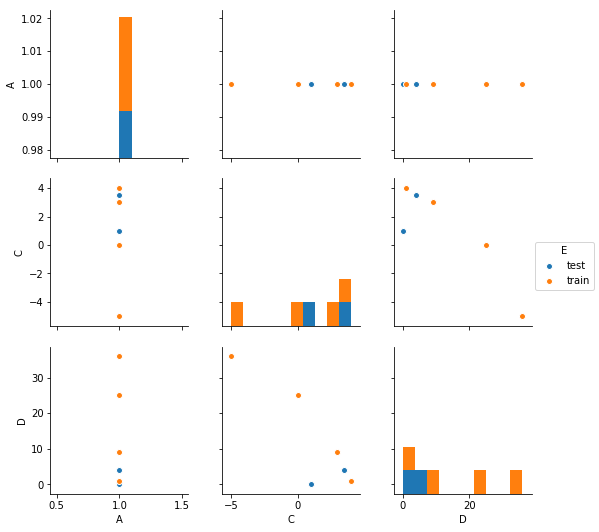

In [55]:
sb.pairplot(df3.dropna(), hue='E')

In [46]:
# Transpose

In [56]:
df3.T

,0,1,2,3,4,5,6
A,1,1,1,1,1,1,1
B,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00
C,1,4,3.5,3,NaN,0,-5
D,0,1,4,9,16,25,36
E,test,train,test,train,test,train,train
F,aha,aha,aha,aha,aha,aha,aha


In [57]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D,E
2018-05-21,0.256086,-0.336289,0.408360,-0.257978,-0.391630
2018-05-22,-0.216293,-1.490697,-1.950902,-0.637594,0.337592
2018-05-23,0.807549,-0.976449,-0.641135,0.744057,1.022976
2018-05-24,-0.211047,0.015365,0.877795,-1.175657,1.831635
2018-05-25,1.598513,0.383699,0.458511,1.067030,1.235242
2018-05-26,-1.073305,2.314414,2.265543,-0.453870,0.859460
2018-05-27,0.651794,0.821288,0.487093,-1.382952,1.923761
2018-05-28,-0.221668,0.157141,-0.049957,1.326913,-0.098124
2018-05-29,-1.068237,-0.250956,1.952019,-0.309581,-1.286875
2018-05-30,1.551657,0.630324,-0.590076,0.864119,1.061824


In [49]:
## Sort by Axis in reverse

In [58]:
df.sort_index(axis=1,ascending=False)

,E,D,C,B,A
2018-05-21,-0.391630,-0.257978,0.408360,-0.336289,0.256086
2018-05-22,0.337592,-0.637594,-1.950902,-1.490697,-0.216293
2018-05-23,1.022976,0.744057,-0.641135,-0.976449,0.807549
2018-05-24,1.831635,-1.175657,0.877795,0.015365,-0.211047
2018-05-25,1.235242,1.067030,0.458511,0.383699,1.598513
2018-05-26,0.859460,-0.453870,2.265543,2.314414,-1.073305
2018-05-27,1.923761,-1.382952,0.487093,0.821288,0.651794
2018-05-28,-0.098124,1.326913,-0.049957,0.157141,-0.221668
2018-05-29,-1.286875,-0.309581,1.952019,-0.250956,-1.068237
2018-05-30,1.061824,0.864119,-0.590076,0.630324,1.551657


In [59]:
df3.sort_values(by='C')

,A,B,C,D,E,F
6,1.0,2018-05-23,-5.0,36,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
0,1.0,2018-05-23,1.0,0,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [51]:
# Notice NaN gets last

### Selection 

Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

In [60]:
df3['D']

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: D, dtype: int64

In [61]:
df3.D #same as above! Syntactic Sugar!

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: D, dtype: int64

In [62]:
df3[:5]

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [63]:
df3[2:5]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [64]:
df3[2:5:2]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [65]:
df3[::-1]

,A,B,C,D,E,F
6,1.0,2018-05-23,-5.0,36,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
0,1.0,2018-05-23,1.0,0,test,aha


## Selection by Label

For getting a cross section using a label:

In [66]:
df

,A,B,C,D,E
2018-05-21,0.256086,-0.336289,0.408360,-0.257978,-0.391630
2018-05-22,-0.216293,-1.490697,-1.950902,-0.637594,0.337592
2018-05-23,0.807549,-0.976449,-0.641135,0.744057,1.022976
2018-05-24,-0.211047,0.015365,0.877795,-1.175657,1.831635
2018-05-25,1.598513,0.383699,0.458511,1.067030,1.235242
2018-05-26,-1.073305,2.314414,2.265543,-0.453870,0.859460
2018-05-27,0.651794,0.821288,0.487093,-1.382952,1.923761
2018-05-28,-0.221668,0.157141,-0.049957,1.326913,-0.098124
2018-05-29,-1.068237,-0.250956,1.952019,-0.309581,-1.286875
2018-05-30,1.551657,0.630324,-0.590076,0.864119,1.061824


In [67]:
df.loc[dates[0]]

A    0.256086
B   -0.336289
C    0.408360
D   -0.257978
E   -0.391630
Name: 2018-05-21 00:00:00, dtype: float64

In [68]:
df.loc[dates[2:5]]

,A,B,C,D,E
2018-05-23,0.807549,-0.976449,-0.641135,0.744057,1.022976
2018-05-24,-0.211047,0.015365,0.877795,-1.175657,1.831635
2018-05-25,1.598513,0.383699,0.458511,1.067030,1.235242


In [ ]:
## Selecting on a multi-axis by label:

In [69]:
df.loc[:, ['A','B','C']]

,A,B,C
2018-05-21,0.256086,-0.336289,0.408360
2018-05-22,-0.216293,-1.490697,-1.950902
2018-05-23,0.807549,-0.976449,-0.641135
2018-05-24,-0.211047,0.015365,0.877795
2018-05-25,1.598513,0.383699,0.458511
2018-05-26,-1.073305,2.314414,2.265543
2018-05-27,0.651794,0.821288,0.487093
2018-05-28,-0.221668,0.157141,-0.049957
2018-05-29,-1.068237,-0.250956,1.952019
2018-05-30,1.551657,0.630324,-0.590076


In [70]:
df.loc[dates[2:5], ['A','B','C']]

,A,B,C
2018-05-23,0.807549,-0.976449,-0.641135
2018-05-24,-0.211047,0.015365,0.877795
2018-05-25,1.598513,0.383699,0.458511


In [71]:
df.loc['20180525':'20180601',['B','C']]

,B,C
2018-05-25,0.383699,0.458511
2018-05-26,2.314414,2.265543
2018-05-27,0.821288,0.487093
2018-05-28,0.157141,-0.049957
2018-05-29,-0.250956,1.952019
2018-05-30,0.630324,-0.590076
2018-05-31,0.384844,2.101675
2018-06-01,0.965597,0.673741


In [ ]:
# Reduction in the dimensions of the returned object:

In [72]:
df.loc['20180526', ["B", "D"]]

B    2.314414
D   -0.453870
Name: 2018-05-26 00:00:00, dtype: float64

In [70]:
## Getting scalars (single values)

In [73]:
df.loc['20180526', ["D"]]

D   -0.45387
Name: 2018-05-26 00:00:00, dtype: float64

In [ ]:
# same as above

In [74]:
df.at[dates[5],'D']

-0.45386981880752814

In [ ]:
## Selection by Position

In [75]:
df.iloc[3]

A   -0.211047
B    0.015365
C    0.877795
D   -1.175657
E    1.831635
Name: 2018-05-24 00:00:00, dtype: float64

In [ ]:
# By integer slices, acting similar to numpy/python:

In [76]:
df.iloc[2:5,:2]

,A,B
2018-05-23,0.807549,-0.976449
2018-05-24,-0.211047,0.015365
2018-05-25,1.598513,0.383699


In [ ]:
# By lists of integer position locations, similar to the numpy/python style:

In [77]:
df.iloc[[3,5,1],[1,4,2]]

,B,E,C
2018-05-24,-1.026878,-0.724405,1.221052
2018-05-26,0.390483,-0.241471,1.081258
2018-05-22,-0.770276,1.467098,-0.750628


In [77]:
df.iloc[2,2]

-0.6411347414666033

In [ ]:
# For getting fast access to a scalar (equivalent to the prior method):

In [81]:
df.iat[2,2]

0.8148779121155111

## Boolean Indexing

In [ ]:
## Using a single column’s values to select data.

In [80]:
df[df.A > 0.2]

,A,B,C,D,E
2018-05-24,0.423742,-1.026878,1.221052,-0.362492,-0.724405
2018-05-27,0.981371,-0.865024,-0.181617,-1.714239,0.105939
2018-05-28,0.367928,0.706278,1.378531,-1.472290,1.486004
2018-05-30,0.249698,1.940042,-0.409511,1.788361,-0.653785
2018-06-01,0.235669,-0.190245,-0.105172,-0.800224,0.631288


In [85]:
df[df > 0]

,A,B,C,D,E
2018-05-21,0.104972,NaN,NaN,NaN,0.579081
2018-05-22,NaN,NaN,NaN,NaN,1.467098
2018-05-23,NaN,NaN,0.814878,NaN,0.032107
2018-05-24,0.423742,NaN,1.221052,NaN,NaN
2018-05-25,NaN,0.746424,1.170539,NaN,NaN
2018-05-26,NaN,0.390483,1.081258,NaN,NaN
2018-05-27,0.981371,NaN,NaN,NaN,0.105939
2018-05-28,0.367928,0.706278,1.378531,NaN,1.486004
2018-05-29,NaN,NaN,NaN,NaN,NaN
2018-05-30,0.249698,1.940042,NaN,1.788361,NaN


In [86]:
df[df > 1]

,A,B,C,D,E
2018-05-21,NaN,NaN,NaN,NaN,NaN
2018-05-22,NaN,NaN,NaN,NaN,1.467098
2018-05-23,NaN,NaN,NaN,NaN,NaN
2018-05-24,NaN,NaN,1.221052,NaN,NaN
2018-05-25,NaN,NaN,1.170539,NaN,NaN
2018-05-26,NaN,NaN,1.081258,NaN,NaN
2018-05-27,NaN,NaN,NaN,NaN,NaN
2018-05-28,NaN,NaN,1.378531,NaN,1.486004
2018-05-29,NaN,NaN,NaN,NaN,NaN
2018-05-30,NaN,1.940042,NaN,1.788361,NaN


In [78]:
s1 = pd.Series([x**3 for x in range(15)], index=pd.date_range('20130521', periods=15))
s1

2013-05-21       0
2013-05-22       1
2013-05-23       8
2013-05-24      27
2013-05-25      64
2013-05-26     125
2013-05-27     216
2013-05-28     343
2013-05-29     512
2013-05-30     729
2013-05-31    1000
2013-06-01    1331
2013-06-02    1728
2013-06-03    2197
2013-06-04    2744
Freq: D, dtype: int64

In [79]:
df['F'] = s1
df

,A,B,C,D,E,F
2018-05-21,0.256086,-0.336289,0.408360,-0.257978,-0.391630,NaN
2018-05-22,-0.216293,-1.490697,-1.950902,-0.637594,0.337592,NaN
2018-05-23,0.807549,-0.976449,-0.641135,0.744057,1.022976,NaN
2018-05-24,-0.211047,0.015365,0.877795,-1.175657,1.831635,NaN
2018-05-25,1.598513,0.383699,0.458511,1.067030,1.235242,NaN
2018-05-26,-1.073305,2.314414,2.265543,-0.453870,0.859460,NaN
2018-05-27,0.651794,0.821288,0.487093,-1.382952,1.923761,NaN
2018-05-28,-0.221668,0.157141,-0.049957,1.326913,-0.098124,NaN
2018-05-29,-1.068237,-0.250956,1.952019,-0.309581,-1.286875,NaN
2018-05-30,1.551657,0.630324,-0.590076,0.864119,1.061824,NaN


In [110]:
## This is apparently a bug! https://github.com/pandas-dev/pandas/issues/10440

In [80]:
df['F']=42
df

,A,B,C,D,E,F
2018-05-21,0.256086,-0.336289,0.408360,-0.257978,-0.391630,42
2018-05-22,-0.216293,-1.490697,-1.950902,-0.637594,0.337592,42
2018-05-23,0.807549,-0.976449,-0.641135,0.744057,1.022976,42
2018-05-24,-0.211047,0.015365,0.877795,-1.175657,1.831635,42
2018-05-25,1.598513,0.383699,0.458511,1.067030,1.235242,42
2018-05-26,-1.073305,2.314414,2.265543,-0.453870,0.859460,42
2018-05-27,0.651794,0.821288,0.487093,-1.382952,1.923761,42
2018-05-28,-0.221668,0.157141,-0.049957,1.326913,-0.098124,42
2018-05-29,-1.068237,-0.250956,1.952019,-0.309581,-1.286875,42
2018-05-30,1.551657,0.630324,-0.590076,0.864119,1.061824,42


In [109]:
df['G']=[x**3 for x in range(15)] # passing a fresh list to particular column
df

,A,B,C,D,E,F,G
2018-05-21,0.104972,-0.768879,-0.884686,-2.384684,0.579081,42,0
2018-05-22,-1.350381,-0.770276,-0.750628,-0.715447,1.467098,42,1
2018-05-23,-1.107118,-0.385330,0.814878,-0.588247,0.032107,42,8
2018-05-24,0.423742,-1.026878,1.221052,-0.362492,-0.724405,42,27
2018-05-25,-1.250178,0.746424,1.170539,-1.158424,-0.650413,42,64
2018-05-26,-0.896434,0.390483,1.081258,-1.867106,-0.241471,42,125
2018-05-27,0.981371,-0.865024,-0.181617,-1.714239,0.105939,42,216
2018-05-28,0.367928,0.706278,1.378531,-1.472290,1.486004,42,343
2018-05-29,-0.784246,-1.784039,-0.776172,-0.208957,-1.959150,42,512
2018-05-30,0.249698,1.940042,-0.409511,1.788361,-0.653785,42,729


In [97]:
s1

2013-05-21       0
2013-05-22       1
2013-05-23       8
2013-05-24      27
2013-05-25      64
2013-05-26     125
2013-05-27     216
2013-05-28     343
2013-05-29     512
2013-05-30     729
2013-05-31    1000
2013-06-01    1331
2013-06-02    1728
2013-06-03    2197
2013-06-04    2744
Freq: D, dtype: int64

In [81]:
s1+2

2013-05-21       2
2013-05-22       3
2013-05-23      10
2013-05-24      29
2013-05-25      66
2013-05-26     127
2013-05-27     218
2013-05-28     345
2013-05-29     514
2013-05-30     731
2013-05-31    1002
2013-06-01    1333
2013-06-02    1730
2013-06-03    2199
2013-06-04    2746
Freq: D, dtype: int64

In [82]:
s1/3

2013-05-21      0.000000
2013-05-22      0.333333
2013-05-23      2.666667
2013-05-24      9.000000
2013-05-25     21.333333
2013-05-26     41.666667
2013-05-27     72.000000
2013-05-28    114.333333
2013-05-29    170.666667
2013-05-30    243.000000
2013-05-31    333.333333
2013-06-01    443.666667
2013-06-02    576.000000
2013-06-03    732.333333
2013-06-04    914.666667
Freq: D, dtype: float64

In [83]:
df.at[dates[1], 'A'] = 33
df

,A,B,C,D,E,F
2018-05-21,0.256086,-0.336289,0.408360,-0.257978,-0.391630,42
2018-05-22,33.000000,-1.490697,-1.950902,-0.637594,0.337592,42
2018-05-23,0.807549,-0.976449,-0.641135,0.744057,1.022976,42
2018-05-24,-0.211047,0.015365,0.877795,-1.175657,1.831635,42
2018-05-25,1.598513,0.383699,0.458511,1.067030,1.235242,42
2018-05-26,-1.073305,2.314414,2.265543,-0.453870,0.859460,42
2018-05-27,0.651794,0.821288,0.487093,-1.382952,1.923761,42
2018-05-28,-0.221668,0.157141,-0.049957,1.326913,-0.098124,42
2018-05-29,-1.068237,-0.250956,1.952019,-0.309581,-1.286875,42
2018-05-30,1.551657,0.630324,-0.590076,0.864119,1.061824,42


In [84]:
df.iat[4,4]= 42
df

,A,B,C,D,E,F
2018-05-21,0.256086,-0.336289,0.408360,-0.257978,-0.391630,42
2018-05-22,33.000000,-1.490697,-1.950902,-0.637594,0.337592,42
2018-05-23,0.807549,-0.976449,-0.641135,0.744057,1.022976,42
2018-05-24,-0.211047,0.015365,0.877795,-1.175657,1.831635,42
2018-05-25,1.598513,0.383699,0.458511,1.067030,42.000000,42
2018-05-26,-1.073305,2.314414,2.265543,-0.453870,0.859460,42
2018-05-27,0.651794,0.821288,0.487093,-1.382952,1.923761,42
2018-05-28,-0.221668,0.157141,-0.049957,1.326913,-0.098124,42
2018-05-29,-1.068237,-0.250956,1.952019,-0.309581,-1.286875,42
2018-05-30,1.551657,0.630324,-0.590076,0.864119,1.061824,42


In [85]:
df3 = df.copy()

In [86]:
df3[df3 > 0.2 ] = -df3
df3

,A,B,C,D,E,F
2018-05-21,-0.256086,-0.336289,-0.408360,-0.257978,-0.391630,-42
2018-05-22,-33.000000,-1.490697,-1.950902,-0.637594,-0.337592,-42
2018-05-23,-0.807549,-0.976449,-0.641135,-0.744057,-1.022976,-42
2018-05-24,-0.211047,0.015365,-0.877795,-1.175657,-1.831635,-42
2018-05-25,-1.598513,-0.383699,-0.458511,-1.067030,-42.000000,-42
2018-05-26,-1.073305,-2.314414,-2.265543,-0.453870,-0.859460,-42
2018-05-27,-0.651794,-0.821288,-0.487093,-1.382952,-1.923761,-42
2018-05-28,-0.221668,0.157141,-0.049957,-1.326913,-0.098124,-42
2018-05-29,-1.068237,-0.250956,-1.952019,-0.309581,-1.286875,-42
2018-05-30,-1.551657,-0.630324,-0.590076,-0.864119,-1.061824,-42


In [ ]:
# Missing Data
# pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations

In [87]:
df['H'] = s1
df

,A,B,C,D,E,F,H
2018-05-21,0.256086,-0.336289,0.408360,-0.257978,-0.391630,42,NaN
2018-05-22,33.000000,-1.490697,-1.950902,-0.637594,0.337592,42,NaN
2018-05-23,0.807549,-0.976449,-0.641135,0.744057,1.022976,42,NaN
2018-05-24,-0.211047,0.015365,0.877795,-1.175657,1.831635,42,NaN
2018-05-25,1.598513,0.383699,0.458511,1.067030,42.000000,42,NaN
2018-05-26,-1.073305,2.314414,2.265543,-0.453870,0.859460,42,NaN
2018-05-27,0.651794,0.821288,0.487093,-1.382952,1.923761,42,NaN
2018-05-28,-0.221668,0.157141,-0.049957,1.326913,-0.098124,42,NaN
2018-05-29,-1.068237,-0.250956,1.952019,-0.309581,-1.286875,42,NaN
2018-05-30,1.551657,0.630324,-0.590076,0.864119,1.061824,42,NaN


In [88]:
df.fillna(value=3.14)

,A,B,C,D,E,F,H
2018-05-21,0.256086,-0.336289,0.408360,-0.257978,-0.391630,42,3.14
2018-05-22,33.000000,-1.490697,-1.950902,-0.637594,0.337592,42,3.14
2018-05-23,0.807549,-0.976449,-0.641135,0.744057,1.022976,42,3.14
2018-05-24,-0.211047,0.015365,0.877795,-1.175657,1.831635,42,3.14
2018-05-25,1.598513,0.383699,0.458511,1.067030,42.000000,42,3.14
2018-05-26,-1.073305,2.314414,2.265543,-0.453870,0.859460,42,3.14
2018-05-27,0.651794,0.821288,0.487093,-1.382952,1.923761,42,3.14
2018-05-28,-0.221668,0.157141,-0.049957,1.326913,-0.098124,42,3.14
2018-05-29,-1.068237,-0.250956,1.952019,-0.309581,-1.286875,42,3.14
2018-05-30,1.551657,0.630324,-0.590076,0.864119,1.061824,42,3.14


In [ ]:
# there is also df.dropna() to drop any ROWS! with missing data

## Operations

In [89]:
df.mean()

A     2.449628
B     0.182004
C     0.318265
D    -0.183465
E     3.077733
F    42.000000
H          NaN
dtype: float64

In [128]:
# Other axis

In [90]:
df.mean(1)

2018-05-21     6.946425
2018-05-22    11.876400
2018-05-23     7.159500
2018-05-24     7.223015
2018-05-25    14.584626
2018-05-26     7.652040
2018-05-27     7.416831
2018-05-28     7.185718
2018-05-29     6.839395
2018-05-30     7.586308
2018-05-31     7.688562
2018-06-01     7.231207
2018-06-02     6.536211
2018-06-03     7.284269
2018-06-04     6.399905
Freq: D, dtype: float64

In [ ]:
## Apply

In [91]:
df.apply(lambda x: x*3) # ie same as df*3

,A,B,C,D,E,F,H
2018-05-21,0.768257,-1.008868,1.225080,-0.773934,-1.174890,126,NaN
2018-05-22,99.000000,-4.472091,-5.852705,-1.912783,1.012776,126,NaN
2018-05-23,2.422647,-2.929348,-1.923404,2.232171,3.068928,126,NaN
2018-05-24,-0.633142,0.046095,2.633385,-3.526972,5.494906,126,NaN
2018-05-25,4.795539,1.151098,1.375533,3.201090,126.000000,126,NaN
2018-05-26,-3.219916,6.943242,6.796629,-1.361609,2.578380,126,NaN
2018-05-27,1.955382,2.463865,1.461279,-4.148855,5.771282,126,NaN
2018-05-28,-0.665003,0.471423,-0.149870,3.980738,-0.294372,126,NaN
2018-05-29,-3.204710,-0.752867,5.856056,-0.928744,-3.860624,126,NaN
2018-05-30,4.654970,1.890973,-1.770228,2.592358,3.185472,126,NaN


In [95]:
ts = pd.Series(np.random.randn(3650), index=pd.date_range('11/18/2008', periods=3650))

In [96]:
ts = ts.cumsum() # cumulative sum

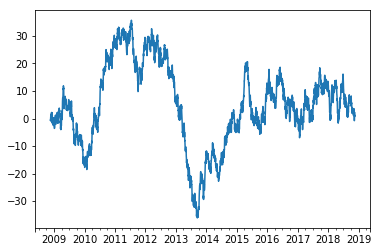

In [97]:
ts.plot()

In [ ]:
# CSV
# Writing to a csv file.

In [98]:
df.to_csv("testing.csv")

In [ ]:
# Reading from csv


In [99]:
df5= pd.read_csv('resources/random4x9.csv')
df5

,0.728092422,0.439549556,0.966094444,0.951034076
0,0.437894,0.565248,0.265487,0.873076
1,0.688209,0.414446,0.338064,0.565203
2,0.140006,0.955224,0.070588,0.097647
3,0.033173,0.776771,0.082005,0.195883
4,0.323899,0.602774,0.772657,0.535500
5,0.783822,0.445450,0.091232,0.248653
6,0.075322,0.135286,0.593997,0.311714
7,0.312120,0.700501,0.446117,0.851981


In [139]:
df5

,Unnamed: 0,A,B,C,D,E,F,G,H
0,2018-05-21,0.104972,-0.768879,-0.884686,-2.384684,0.579081,42,0,NaN
1,2018-05-22,33.000000,-0.770276,-0.750628,-0.715447,1.467098,42,1,NaN
2,2018-05-23,-1.107118,-0.385330,0.814878,-0.588247,0.032107,42,8,NaN
3,2018-05-24,0.423742,-1.026878,1.221052,-0.362492,-0.724405,42,27,NaN
4,2018-05-25,-1.250178,0.746424,1.170539,-1.158424,42.000000,42,64,NaN
5,2018-05-26,-0.896434,0.390483,1.081258,-1.867106,-0.241471,42,125,NaN
6,2018-05-27,0.981371,-0.865024,-0.181617,-1.714239,0.105939,42,216,NaN
7,2018-05-28,0.367928,0.706278,1.378531,-1.472290,1.486004,42,343,NaN
8,2018-05-29,-0.784246,-1.784039,-0.776172,-0.208957,-1.959150,42,512,NaN
9,2018-05-30,0.249698,1.940042,-0.409511,1.788361,-0.653785,42,729,NaN


In [ ]:
# Excel

In [100]:
df.to_excel('myx.xlsx', sheet_name='Sheet1')


In [101]:
df6=pd.read_excel('myx.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [143]:
df6

,A,B,C,D,E,F,G,H
2018-05-21,0.104972,-0.768879,-0.884686,-2.384684,0.579081,42,0,NaN
2018-05-22,33.000000,-0.770276,-0.750628,-0.715447,1.467098,42,1,NaN
2018-05-23,-1.107118,-0.385330,0.814878,-0.588247,0.032107,42,8,NaN
2018-05-24,0.423742,-1.026878,1.221052,-0.362492,-0.724405,42,27,NaN
2018-05-25,-1.250178,0.746424,1.170539,-1.158424,42.000000,42,64,NaN
2018-05-26,-0.896434,0.390483,1.081258,-1.867106,-0.241471,42,125,NaN
2018-05-27,0.981371,-0.865024,-0.181617,-1.714239,0.105939,42,216,NaN
2018-05-28,0.367928,0.706278,1.378531,-1.472290,1.486004,42,343,NaN
2018-05-29,-0.784246,-1.784039,-0.776172,-0.208957,-1.959150,42,512,NaN
2018-05-30,0.249698,1.940042,-0.409511,1.788361,-0.653785,42,729,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2018-05-21 to 2018-06-04
Freq: D
Data columns (total 7 columns):
A    15 non-null float64
B    15 non-null float64
C    15 non-null float64
D    15 non-null float64
E    15 non-null float64
F    15 non-null int64
H    0 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.6 KB


In [146]:
df.info(memory_usage="deep") # more reliable info

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2018-05-21 to 2018-06-04
Freq: D
Data columns (total 8 columns):
A    15 non-null float64
B    15 non-null float64
C    15 non-null float64
D    15 non-null float64
E    15 non-null float64
F    15 non-null int64
G    15 non-null int64
H    0 non-null float64
dtypes: float64(6), int64(2)
memory usage: 1.6 KB
